# Exploratory data analysis of Disney datasets 

## Author: Gloria Mo

## Introduction

### Question of Interest

I will be investigating the relationship between a Disney movie and its success with having a theme song. I am interested to see if Disney movies with a theme song perform better than Disney movies without a theme song in terms of inflation adjusted gross. I expect movies with a theme song to have higher inflation adjusted gross than Disney movies without a theme song. This inference is because the general audience of Disney movies are usually younger in age, thus, I believe having a theme song would be more entertaining and can also increase the popularity of the movie if the song is successful. To add on, I believe a big part that makes a Disney movie "Disney" is if the movie can feel fantastical and magical for the viewers and I believe a musical production contributes highly to making Disney movies successful. 


***Question: Do Disney movies that feature a theme song generate higher inflation adjusted gross than Disney movies without a theme song?***


### Dataset Description
The dataset used for Disney movies is taken from this [website:](https://data.world/kgarrett/disney-character-success-00-16)

The Disney dataset is composed of 5 tables: disney_movies_total_gross.csv, disney_revenue_1991-2006.csv, disney-characters.csv, disney-director.csv, disney-voice-actors.csv. Each table is stored in a `.csv` file and contains different information about Disney movies including the total gross, total revenue, characters, directors, and voice actors.

The datasets I used in this analysis are:
* **disney-characters.csv**
    * This file contains information on Disney movies such as the movie title, the release date, the villian and heros involved in the storyline, and the song title if the movie has one.
* **disney_movies_total_gross.csv**
    * This file contains information on Disney movies such as release date, genre, MPAA rating, total gross, and inflation adjusted gross.


## Methods and Results

I will only be using the disney characters and total gross tables as all the information I require to answer my question can be answered with this data.

First we will import in all our data and visualize how the tables look:

In [1]:
# import all required libraries
import altair as alt
import pandas as pd
import numpy as np

# import all the required files
characters = pd.read_csv('data/disney-characters.csv')
gross = pd.read_csv("data/disney_movies_total_gross.csv")

Let's take a look at the tables:

In [2]:
characters.head()

,movie_title,release_date,hero,villian,song
0,\nSnow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,\nPinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,\nFantasia,"November 13, 1940",NaN,Chernabog,NaN
3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,\nBambi,"August 13, 1942",Bambi,Hunter,Love Is a Song


In [3]:
gross.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


Since I am interested in the variable inflation_adjusted_gross, I would like to eventually sort this value in descending order to compare different relationships. First, I will remove the '$' in the column so that inflation adjusted gross can be properly sorted.


In [4]:
# Remove the $ so that inflation adjusted gross can be sorted properly
gross["inflation_adjusted_gross"] = gross["inflation_adjusted_gross"].replace("[$,]", "", regex=True).astype(int).round(8)
gross = gross.sort_values(by=['inflation_adjusted_gross'], kind="mergesort", ascending=False)
gross_clean = gross.dropna(subset=['inflation_adjusted_gross'])

gross_clean.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485",5228953251
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000",2188229052
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000",2187090808
8,101 Dalmatians,"Jan 25, 1961",Comedy,G,"$153,000,000",1362870985
6,Lady and the Tramp,"Jun 22, 1955",Drama,G,"$93,600,000",1236035515


To begin, I want to have a dataframe that shows only movies **with** a theme song. In the 'characters' dataframe with 56 disney movies, only 45 movies have theme songs. 

In [5]:
# Clean up blank spaces in movie_title column 
characters_clean = characters.assign(movie_title = characters['movie_title'].str.strip())
characters_clean = characters_clean.assign(song = characters_clean['song'].str.strip())
characters_clean = characters_clean.replace(r'^\s*$', np.nan, regex=True)

# Drop all movies with no theme song
characters_song = characters_clean.dropna(subset=['song']).reset_index(drop=True)
characters_song

,movie_title,release_date,hero,villian,song
0,Snow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
3,Bambi,"August 13, 1942",Bambi,Hunter,Love Is a Song
4,Saludos Amigos,"February 6, 1943",Donald Duck,NaN,Saludos Amigos
5,Melody Time,"May 27, 1948",NaN,NaN,Little Toot
6,The Adventures of Ichabod and Mr. Toad,"October 5, 1949",Mr. Toad and Ichabod Crane,Mr. Winkie and The Headless Horseman,The Merrily Song
7,Cinderella,"February 15, 1950",Cinderella,Lady Tremaine,Bibbidi-Bobbidi-Boo
8,Alice in Wonderland,"July 28, 1951",Alice,Queen of Hearts,The Unbirthday Song
9,Peter Pan,"February 5, 1953",Peter Pan,Captain Hook,You Can Fly!


Next I want a dataframe showcasing only movies **without** a theme song. There are 10 movies with no theme songs in the 'characters' table.

In [8]:
# drop all movies with a theme song
characters_no_song = characters_clean[characters_clean['song'].isnull()]
characters_no_song = characters_no_song.reset_index(drop=True)
characters_no_song

,movie_title,release_date,hero,villian,song
0,Fantasia,"November 13, 1940",NaN,Chernabog,NaN
1,The Three Caballeros,"February 3, 1945",Donald Duck,NaN,NaN
2,Make Mine Music,"April 20, 1946",NaN,NaN,NaN
3,Fun and Fancy Free,"September 27, 1947",Mickey Mouse,Willie the Giant,NaN
4,The Black Cauldron,"July 24, 1985",Taran,Horned King,NaN
5,The Rescuers Down Under,"November 16, 1990",Bernard and Miss Bianca,Percival C. McLeach,NaN
6,Fantasia 2000,"December 17, 1999",NaN,NaN,NaN
7,Dinosaur,"May 19, 2000",Aladar,Kron,NaN
8,Home on the Range,"April 2, 2004",Maggie,Alameda Slim,NaN
9,Chicken Little,"November 4, 2005",Ace Cluck,Foxy Loxy,NaN


With the two tables of movies with theme songs and without theme songs, I am able to compare the relationship with inflation adjusted gross between the two tables.

As a first visualization, I want to look at how movies with theme songs perform in terms of inflation adjusted gross. To do this, I will use the movies with songs table and merge it with the gross table to find movies that are included in both dataframes. I will use the 'movie_title' column as the common key column to merge the two dataframes on.

In [9]:
# Merge movies with songs with gross df with all columns showing
characters_song_gross_merged = characters_song.merge(gross_clean, left_on='movie_title', right_on='movie_title', how='left')
characters_song_gross_merged.head()

,movie_title,release_date_x,hero,villian,song,release_date_y,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come,"Dec 21, 1937",Musical,G,"$184,925,485",5.228953e+09
1,Pinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star,"Feb 9, 1940",Adventure,G,"$84,300,000",2.188229e+09
2,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine,NaN,NaN,NaN,NaN,NaN
3,Bambi,"August 13, 1942",Bambi,Hunter,Love Is a Song,NaN,NaN,NaN,NaN,NaN
4,Saludos Amigos,"February 6, 1943",Donald Duck,NaN,Saludos Amigos,NaN,NaN,NaN,NaN,NaN


In [10]:
# Sort in descending order of inflation adjusted gross and display the top 20 
top_20_song_gross_merged = characters_song_gross_merged.sort_values(by=['inflation_adjusted_gross'], ascending=False)[:20]
top_20_song_gross_merged = top_20_song_gross_merged.reset_index(drop=True)

# Drop row 8 as The Jungle Book has a duplicate entry as one was released in 2016 
top_20_song_gross_merged = top_20_song_gross_merged.drop([8,8]).reset_index(drop=True)
top_20_song_gross_merged

,movie_title,release_date_x,hero,villian,song,release_date_y,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come,"Dec 21, 1937",Musical,G,"$184,925,485",5.228953e+09
1,Pinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star,"Feb 9, 1940",Adventure,G,"$84,300,000",2.188229e+09
2,Lady and the Tramp,"June 22, 1955",Lady and Tramp,Si and Am,Bella Notte,"Jun 22, 1955",Drama,G,"$93,600,000",1.236036e+09
3,Cinderella,"February 15, 1950",Cinderella,Lady Tremaine,Bibbidi-Bobbidi-Boo,"Feb 15, 1950",Drama,G,"$85,000,000",9.206087e+08
4,The Jungle Book,"October 18, 1967",Mowgli,Kaa and Shere Khan,The Bare Necessities,"Oct 18, 1967",Musical,Not Rated,"$141,843,000",7.896123e+08
5,The Lion King,"June 24, 1994",Simba,Scar,Circle of Life,"Jun 15, 1994",Adventure,G,"$422,780,140",7.616409e+08
6,Aladdin,"November 25, 1992",Aladdin,Jafar,A Whole New World,"Nov 11, 1992",Comedy,G,"$217,350,219",4.419692e+08
7,Frozen,"November 27, 2013",Elsa,Prince Hans,Let It Go,"Nov 22, 2013",Adventure,PG,"$400,738,009",4.149972e+08
8,Beauty and the Beast,"November 22, 1991",Belle,Gaston,Be Our Guest,"Nov 13, 1991",Musical,G,"$218,951,625",3.630177e+08
9,Alice in Wonderland,"July 28, 1951",Alice,Queen of Hearts,The Unbirthday Song,"Mar 5, 2010",Adventure,PG,"$334,191,110",3.570635e+08


After sorting the table in descending order of inflation adjusted gross and selecting only the top 20 movies to display, we can generate a bar plot to visualize which 20 movies with theme songs have the highest inflation adjusted gross.

In [11]:
# Use altair to generate a bar plot
top_20_song_gross_merged_plot = (
    alt.Chart(top_20_song_gross_merged, width=500, height=300) 
    .mark_bar()
    .encode(
        x=alt.X("movie_title:O", title="Movie Title", sort='y'),
        y=alt.Y("inflation_adjusted_gross:Q", title="Inflation Adjusted Gross"),
    )
    .properties(title="Top 20 movies with Theme Songs in Inflation Adjusted Gross")
)
top_20_song_gross_merged_plot

alt.Chart(...)

From the plot, we can see the movies with theme songs and how they perform in terms of inflation adjusted gross. We can see that Snow White and the Seven Dwarfs takes the top spot with over 5 billion dollars generated in inflation adjusted gross. 


Next we will do perform the same steps to see which movies with no theme song have the highest inflation adjusted gross.

In [13]:
# Merge characters_no_song with gross df
characters_no_song_merged = characters_no_song.merge(gross_clean, left_on='movie_title', right_on='movie_title', how='left')

# Sort in descending order of inflation adjusted gross and display the top 20
characters_no_song_merged = characters_no_song_merged.dropna(subset=['inflation_adjusted_gross'])
top_20_characters_no_song_merged = characters_no_song_merged.sort_values(by=['inflation_adjusted_gross'], ascending=False).reset_index(drop=True)
top_20_characters_no_song_merged

,movie_title,release_date_x,hero,villian,song,release_date_y,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Fantasia,"November 13, 1940",NaN,Chernabog,NaN,"Nov 13, 1940",Musical,G,"$83,320,000",2.187091e+09
1,Dinosaur,"May 19, 2000",Aladar,Kron,NaN,"May 19, 2000",Adventure,PG,"$137,748,063",2.154390e+08
2,Chicken Little,"November 4, 2005",Ace Cluck,Foxy Loxy,NaN,"Nov 4, 2005",Adventure,G,"$135,386,665",1.779547e+08
3,Home on the Range,"April 2, 2004",Maggie,Alameda Slim,NaN,"Apr 2, 2004",Comedy,PG,"$50,026,353",6.791017e+07
4,The Rescuers Down Under,"November 16, 1990",Bernard and Miss Bianca,Percival C. McLeach,NaN,"Nov 16, 1990",Adventure,G,"$27,931,461",5.579673e+07
5,The Black Cauldron,"July 24, 1985",Taran,Horned King,NaN,"Jul 24, 1985",Adventure,NaN,"$21,288,692",5.055314e+07


In [14]:
# Use altair to generate a bar plot
top_20_characters_no_song_merged_plot = (
    alt.Chart(top_20_characters_no_song_merged, width=500, height=300) 
    .mark_bar()
    .encode(
        x=alt.X("movie_title:O", title="Movie Title", sort='y'),
        y=alt.Y("inflation_adjusted_gross:Q", title="Inflation Adjusted Gross"),
    )
    .properties(title="Top Movies Without a Theme Song in Inflation Adjusted Gross")
)
top_20_characters_no_song_merged_plot

alt.Chart(...)

We can see from this graph that Fantasia is the movie with no theme song that has the highest inflation adjusted gross at over 2 billion dollars.

We can also immediately see by the number of columns shown in the Top movies with no theme song in inflation adjusted gross, there are only 6 movies displayed compared to the previous graph which hold a lot more movies. This could suggest two things-- one is that there are more Disney movies produced with theme songs or that the disney_movies_total_gross.csv does not include all of the songs included in the disney-characters.csv, therefore, they were not merged into the characters_no_song_merged dataframe. 

Another observation is that the top movie, Fantasia, has an inflation adjusted gross a little bit under 2.2 billion dollars which is almost 3 billion dollars less than what Snow White and the Seven Dwarfs generated. This shows that the top movie with a theme song performed significantly better than the top movie without a theme song in inflation adjusted gross.

Next I will merge the characters dataframe and gross dataframe into one full dataframe that include both movies with and without theme songs. I will also create a new column 'has_theme_song' that shows the boolean value of if the movie has a theme song.

In [15]:
# Graph of all movies and inflated adjusted gross

# Merge characters df with gross df with all columns showing
merged_df = characters_clean.merge(gross_clean, left_on='movie_title', right_on='movie_title', how='outer')

# Create new column 'has_theme_song' which shows the boolean value of if the movie has a theme song
merged_df['has_theme_song'] = merged_df['song'].notna()
merged_df.head()

,movie_title,release_date_x,hero,villian,song,release_date_y,genre,MPAA_rating,total_gross,inflation_adjusted_gross,has_theme_song
0,Snow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come,"Dec 21, 1937",Musical,G,"$184,925,485",5.228953e+09,True
1,Pinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star,"Feb 9, 1940",Adventure,G,"$84,300,000",2.188229e+09,True
2,Fantasia,"November 13, 1940",NaN,Chernabog,NaN,"Nov 13, 1940",Musical,G,"$83,320,000",2.187091e+09,False
3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine,NaN,NaN,NaN,NaN,NaN,True
4,Bambi,"August 13, 1942",Bambi,Hunter,Love Is a Song,NaN,NaN,NaN,NaN,NaN,True


Now that we have a dataframe with all movies merged with the inflation adjusted gross, we can group by our newly created column of whether or not a movie has a theme song and calculate the average inflation adjusted gross. I will import and use a script I created with a custom function to group by a grouping column and applies a specific aggregating function with the default being finding the mean.  

In [16]:
# import script
import sample_script as ps

# run function on data to find the mean of inflation adjusted gross for movies with and without a theme song
theme_song_groups = ps.group_by_aggregate(merged_df, 'has_theme_song', 'inflation_adjusted_gross')
theme_song_groups

,has_theme_song,mean
0,False,9.457005e+07
1,True,4.362150e+08


Grouping the movies by song and no song and aggregating the mean value for each group answers our original question of whether movies with songs or movies without songs perform better in terms of inflation adjusted gross. Disney movies that include songs generated on average almost 450 million dollars while movies that don't include songs generated on average almost 100 million dollars. The gap is quite large and from these values we can infer that movies with theme songs tend to perform better in terms of inflation adjusted gross.

We can also generate a bar plot to visualize the gap between the two groups.

In [18]:
# Use altair to generate a bar plot
theme_song_groups_plot = (
    alt.Chart(theme_song_groups, width=500, height=300)
    .mark_bar()
    .encode(
        x=alt.X("has_theme_song:N", title="Has Theme Song"),
        y=alt.Y("mean:Q", title="Average Inflation Adjusted Gross"),
    )
    .properties(title="Average Inflation Adjusted Gross for Disney Movies With and Without a Theme Song")
)
theme_song_groups_plot

alt.Chart(...)

## Discussions

In this analysis, I analyzed the Disney dataset and tried to determine whether movies with a theme song or movies without a theme song performed better in inflation adjusted gross. To start off, I explored how movies with theme songs performed separately from how movies without theme songs performed. I found out that Snow White and the Seven Dwarfs is the movie with a theme song that has the highest inflation adjusted gross at approximately \\$5 billion. I also found out that Fantasia is the movie without a theme song that has the highest inflation adjusted gross at approximately \\$2 billion. Both the top movies seemed to perform significantly better than the rest of the movies, respectively. For example, Snow White generated around \\$3 billion more in inflation adjusted gross compared to the second highest movie with a theme song, Pinocchio. To add on, Fantasia generated around \\$2 billion more in inflation adjusted gross than the second highest movie without a theme song, Dinosaur. It is possible these two movies are outliers in their respective tables as they drastically generated more in inflation adjusted gross compared to the rest of the movies. From this visualization we can see that there are many more movies with theme songs compared to movies without theme songs. On top of that, Snow White generated almost \\$3 billion more in inflation adjusted gross compared to Fantasia, the top movie without a theme song. 

We determined after grouping the two groups of movies with songs and movies without songs, that movies with songs actually do perform better in inflation adjusted gross. Movies with songs generated, on average, \\$450 million. Movies without theme songs generated, on average, \\$100 million. This is a big discrepancy between the two, implying that on average movies with theme songs do perform better in inflation adjusted gross. This is not surprising to me as I originally believed that movies that feature a theme song would perform better in inflation adjusted gross as nowadays I rarely see any Disney movies that don't feature songs or a musical aspect in the film. To add on, I inferred that the audience of Disney movies tend to be younger in age, thus, featuring music in the film can make the film more entertaining. Furthermore, if movies include catchy songs, this can attract a lot of attention to the movie itself, making the movie more successful and talked about as viewers will associate the songs with the movie.

It is important to note that this implication should not be generalized as this finding may be very specific to the unique datasets used. One reason being is that the Disney datasets only date up to 2016 which means the datasets are quite old and missing many recent films. Another reason could be that the ***disney_movies_total_gross.csv*** does not include all of the movies in the ***disney-characters.csv*** as previously mentioned. This would mean that when merging on the dataframes, some movies that are not common in these dataframes are dropped, thus, many points that may contribute to this finding may not be included. 

Another question that could be explored in the future is whethere there is a change in the inflation adjusted gross in movies with songs over the years. One could look at whether movies with theme songs increase in inflation adjusted gross over the years as perhaps directors would feel more inclined to produce more movies with theme songs as they can become more successful than without one. If there is an increase in inflation adjusted gross over the years this may suggest a change in marketing strategy where directors also decide to include more songs and invest more money into making higher quality song productions because movies with theme songs perform better with movies without theme songs. 

## References

* Data Source
    * The Disney [database](https://data.world/kgarrett/disney-character-success-00-16) used in this work was created by Kelly Garrett

* Data Analysis
    * The functions for analysis were inspired by [Elijah Willie](https://kcds.student.stat.ubc.ca/jupyter/user/62115/lab/workspaces/auto-j/tree/prog-python-ds-students/release/project_sample/sample_script.py)


* Data functions
    * For cleaning up [blank spaces](https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas#:~:text=nan%2C%20regex%3DTrue%20in,valid%20data%20contains%20white%20spaces.&text=The%20applymap%20function%20applies%20a%20function%20to%20every%20cell%20of%20the%20dataframe.&text=You%20can%20strip%20all%20str,nan%20.)
    * To remove the [$](https://stackoverflow.com/questions/32464280/how-to-convert-currency-column-with-and-to-numbers/69168456#69168456) in columns



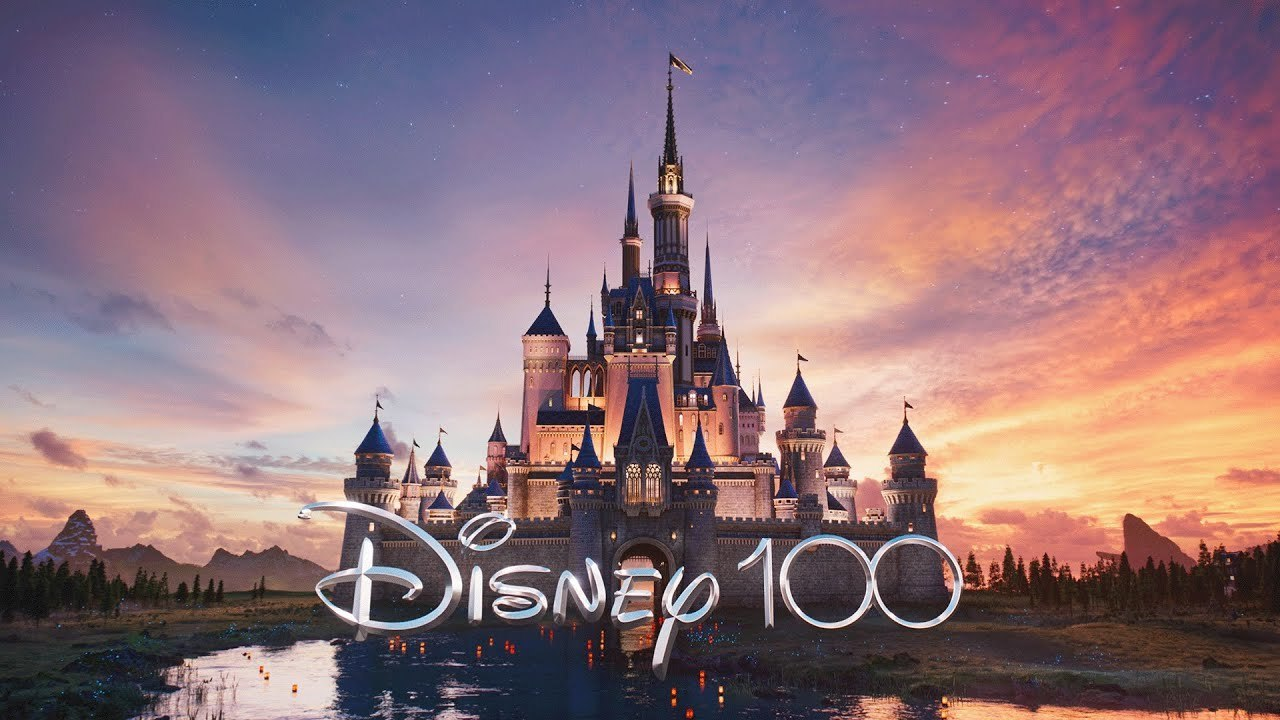